# Diabetes Prediction

# TECHNOHACKS EDUTECH [TASK 3] :

In [1]:
import pandas as pd                 #Import Pandas library for data manipulation and analysis 
import seaborn as sns               #Import Seaborn library for statiscal data visualization
import matplotlib.pyplot as plt     #Import Matplotlib library for data visualization
from sklearn.model_selection import train_test_split   #Import train_test_split function for splittng data
from sklearn.linear_model import LogisticRegression    #Import LogisticRegression class from logistic regression
from sklearn.metrics import classification_report     #Import classification_report function for detailed classification metrics
from sklearn.metrics import f1_score , accuracy_score

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())

#Replacing  0 values with median of its column having skewed distribution

df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())
df['BMI']=df['BMI'].replace(0,df['BMI'].median())

<Axes: xlabel='Outcome', ylabel='count'>

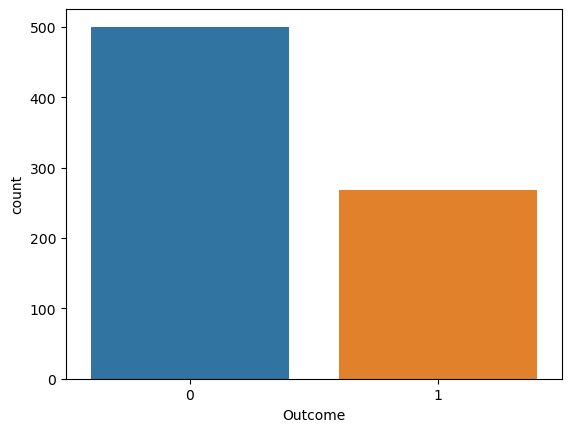

In [16]:
sns.countplot(data=df, x='Outcome')

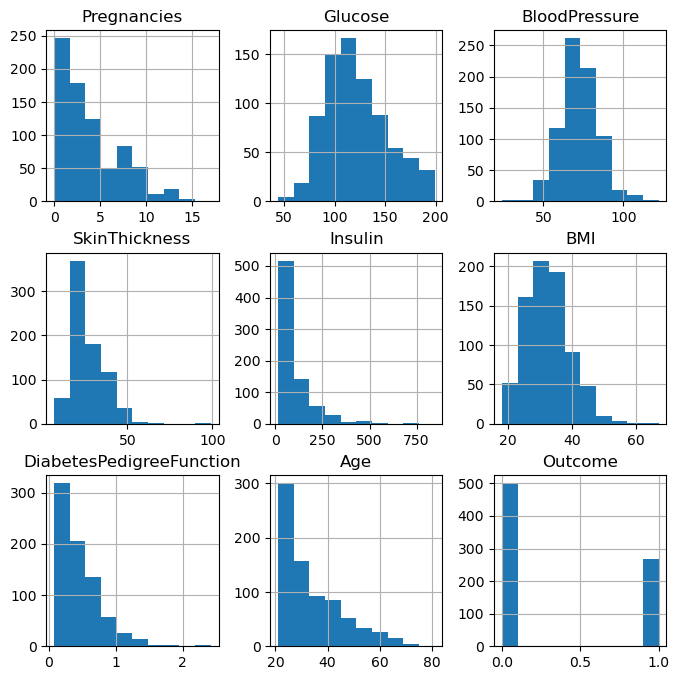

In [17]:
df.hist(bins=10,figsize=(8,8))
plt.show()

<Axes: >

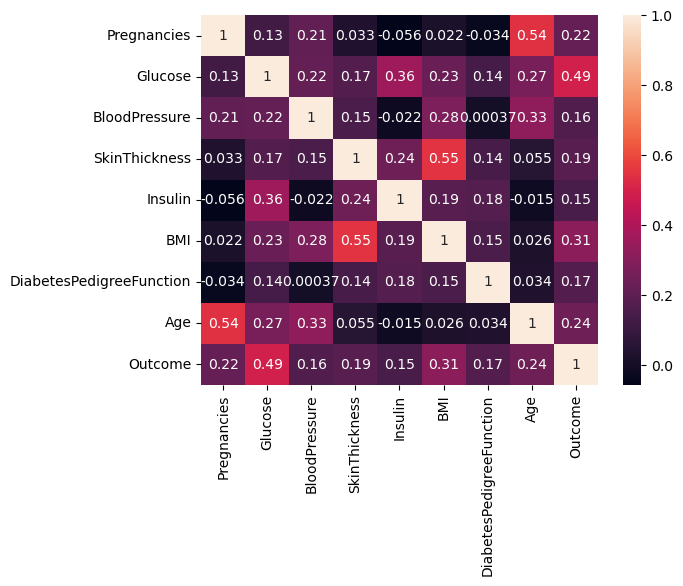

In [18]:
corr_mat=df.corr()
sns.heatmap(corr_mat , annot= True)

In [19]:
df=df.drop(['BloodPressure','Insulin','DiabetesPedigreeFunction'],axis ='columns')

In [20]:
df

,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,6,148.0,35,33.6,50,1
1,1,85.0,29,26.6,31,0
2,8,183.0,23,23.3,32,1
3,1,89.0,23,28.1,21,0
4,0,137.0,35,43.1,33,1
...,...,...,...,...,...,...
763,10,101.0,48,32.9,63,0
764,2,122.0,27,36.8,27,0
765,5,121.0,23,26.2,30,0
766,1,126.0,23,30.1,47,1


In [21]:
#Defining feature variable X and target variable y
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [22]:
X_train,X_test,y_train,y_test= train_test_split(X,y ,test_size =0.2 )

print(X_train.shape,y_train.shape)
print(X_test.shape, y_test.shape)

(614, 5) (614,)
(154, 5) (154,)


In [23]:
model=LogisticRegression()
model.fit(X_train , y_train)

LogisticRegression()

In [24]:
#Generating Predictions
y_predicted=model.predict(X_test)

In [25]:
print(classification_report(y_test ,y_predicted))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       101
           1       0.62      0.57      0.59        53

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.73      0.73      0.73       154



In [26]:
print(f1_score(y_test , y_predicted))

0.594059405940594


In [27]:
print(accuracy_score(y_test , y_predicted))

0.7337662337662337
